In [1]:
import pandas as pd
import plotly.express as px
flight = pd.read_csv('Customer Flight Activity.csv')
loyalty = pd.read_csv('Customer Loyalty History.csv')

In [3]:
flight = flight.drop(['Year', 'Month'], axis=1) #dropping the unnecessary columns

In [5]:
customer = flight.groupby('Loyalty Number', as_index=False).sum()

In [7]:
final = pd.merge(loyalty, customer, on='Loyalty Number', how='inner')
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Loyalty Number               16737 non-null  int64  
 1   Country                      16737 non-null  object 
 2   Province                     16737 non-null  object 
 3   City                         16737 non-null  object 
 4   Postal Code                  16737 non-null  object 
 5   Gender                       16737 non-null  object 
 6   Education                    16737 non-null  object 
 7   Salary                       12499 non-null  float64
 8   Marital Status               16737 non-null  object 
 9   Loyalty Card                 16737 non-null  object 
 10  CLV                          16737 non-null  float64
 11  Enrollment Type              16737 non-null  object 
 12  Enrollment Year              16737 non-null  int64  
 13  Enrollment Month

In [9]:
final_encoded=pd.get_dummies(final, columns=['Gender', 'Loyalty Card'])
final_encoded

Loyalty Number Country          Province        City Postal Code  \
0              480934  Canada           Ontario     Toronto     M2Z 4K1   
1              549612  Canada           Alberta    Edmonton     T3G 6Y6   
2              429460  Canada  British Columbia   Vancouver     V6E 3D9   
3              608370  Canada           Ontario     Toronto     P1W 1K4   
4              530508  Canada            Quebec        Hull     J8Y 3Z5   
...               ...     ...               ...         ...         ...   
16732          823768  Canada  British Columbia   Vancouver     V6E 3Z3   
16733          680886  Canada      Saskatchewan      Regina     S1J 3C5   
16734          776187  Canada  British Columbia   Vancouver     V5R 1W3   
16735          906428  Canada             Yukon  Whitehorse     Y2K 6R0   
16736          652627  Canada          Manitoba    Winnipeg     R2C 0M5   

      Education    Salary Marital Status       CLV Enrollment Type  ...  \
0      Bachelor   83236.0        Married   3839.14        Standard  ...   
1       College       NaN       Divorced   3839.61        Standard  ...   
2       College       NaN         Single   3839.75        Standard  ...   
3       College       NaN         Single   3839.75        Standard  ...   
4      Bachelor  103495.0        Married   3842.79        Standard  ...   
...         ...       ...            ...       ...             ...  ...   
16732   College       NaN        Married  61850.19        Standard  ...   
16733  Bachelor   89210.0        Married  67907.27        Standard  ...   
16734   College       NaN         Single  74228.52        Standard  ...   
16735  Bachelor  -57297.0        Married  10018.66  2018 Promotion  ...   
16736  Bachelor   75049.0        Married  83325.38        Standard  ...   

       Total Flights  Distance  Points Accumulated  Points Redeemed  \
0                 37     54525             54525.0             1418   
1                 58     77487             77487.0             1971   
2                 18     24803             24803.0              374   
3                 35     48432             48432.0             1291   
4                 37     55515             55515.0                0   
...              ...       ...                 ...              ...   
16732             38     53293             53293.0                0   
16733             59     86072             86072.0             1645   
16734             50     61595             61595.0             1529   
16735             51     68843            103264.5                0   
16736              0         0                 0.0                0   

       Dollar Cost Points Redeemed  Gender_Female  Gender_Male  \
0                              256           True        False   
1                              356          False         True   
2                               67          False         True   
3                              233          False         True   
4                                0          False         True   
...                            ...            ...          ...   
16732                            0           True        False   
16733                          296           True        False   
16734                          276          False         True   
16735                            0          False         True   
16736                            0           True        False   

       Loyalty Card_Aurora  Loyalty Card_Nova  Loyalty Card_Star  
0                    False              False               True  
1                    False              False               True  
2                    False              False               True  
3                    False              False               True  
4                    False              False               True  
...                    ...                ...                ...  
16732                False              False               True  
16733                Fa

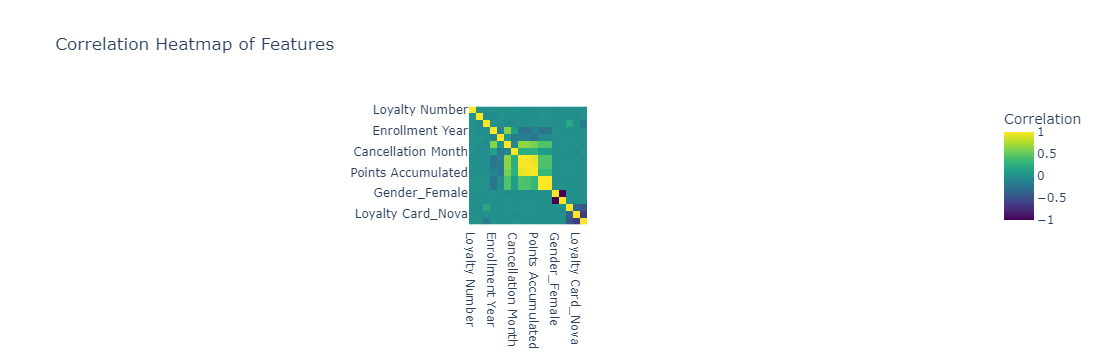

In [11]:
# Create a correlation matrix
num = final_encoded.select_dtypes(include=['int64', 'float64', 'boolean']).columns

correlation_matrix = final_encoded[num].corr()

fig = px.imshow(correlation_matrix,
                labels=dict(color="Correlation"),
                x=correlation_matrix.index,
                y=correlation_matrix.columns,
                color_continuous_scale='Viridis',
                title='Correlation Heatmap of Features')

# Show the plot
fig.show()


In [13]:
final = final.drop(['Country', 'Province','Dollar Cost Points Redeemed'], axis=1)

In [15]:
final['Cancelled'] = final['Cancellation Year'].notna().astype(int) 
final = final.drop(['Cancellation Month', 'Enrollment Month'], axis=1)
final

Loyalty Number        City Postal Code  Gender Education    Salary  \
0              480934     Toronto     M2Z 4K1  Female  Bachelor   83236.0   
1              549612    Edmonton     T3G 6Y6    Male   College       NaN   
2              429460   Vancouver     V6E 3D9    Male   College       NaN   
3              608370     Toronto     P1W 1K4    Male   College       NaN   
4              530508        Hull     J8Y 3Z5    Male  Bachelor  103495.0   
...               ...         ...         ...     ...       ...       ...   
16732          823768   Vancouver     V6E 3Z3  Female   College       NaN   
16733          680886      Regina     S1J 3C5  Female  Bachelor   89210.0   
16734          776187   Vancouver     V5R 1W3    Male   College       NaN   
16735          906428  Whitehorse     Y2K 6R0    Male  Bachelor  -57297.0   
16736          652627    Winnipeg     R2C 0M5  Female  Bachelor   75049.0   

      Marital Status Loyalty Card       CLV Enrollment Type  Enrollment Year  \
0            Married         Star   3839.14        Standard             2016   
1           Divorced         Star   3839.61        Standard             2016   
2             Single         Star   3839.75        Standard             2014   
3             Single         Star   3839.75        Standard             2013   
4            Married         Star   3842.79        Standard             2014   
...              ...          ...       ...             ...              ...   
16732        Married         Star  61850.19        Standard             2012   
16733        Married         Star  67907.27        Standard             2014   
16734         Single         Star  74228.52        Standard             2014   
16735        Married         Star  10018.66  2018 Promotion             2018   
16736        Married         Star  83325.38        Standard             2015   

       Cancellation Year  Total Flights  Distance  Points Accumulated  \
0                    NaN             37     54525             54525.0   
1                    NaN             58     77487             77487.0   
2                 2018.0             18     24803             24803.0   
3                    NaN             35     48432             48432.0   
4                    NaN             37     55515             55515.0   
...                  ...            ...       ...                 ...   
16732                NaN             38     53293             53293.0   
16733                NaN             59     86072             86072.0   
16734                NaN             50     61595             61595.0   
16735                NaN             51     68843            103264.5   
16736             2016.0              0         0                 0.0   

       Points Redeemed  Cancelled  
0                 1418          0  
1                 1971          0  
2                  374          1  
3                 1291          0  
4                    0          0  
...                ...        ...  
16732                0          0  
16733             1645          0  
16734             1529          0  
16735                0          0  
16736                0          1  

[16737 rows x 17 columns]

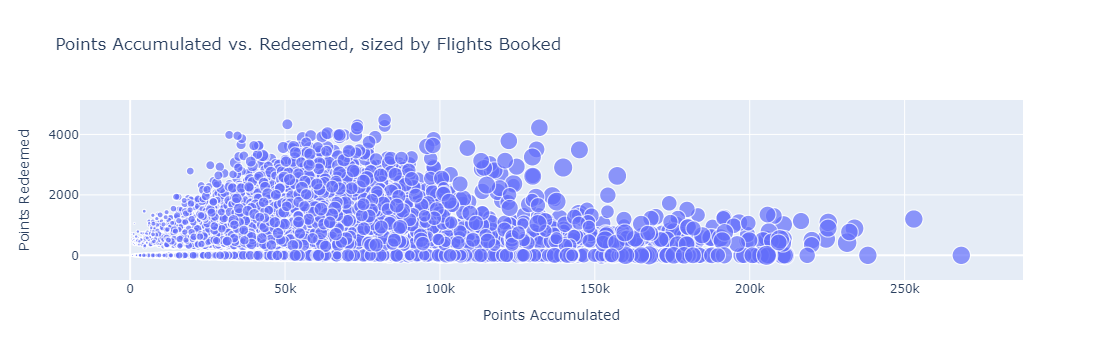

In [19]:
fig0 = px.scatter(final, x='Points Accumulated', y='Points Redeemed',
                         size='Total Flights', hover_data=['Loyalty Number'],
                         title='Points Accumulated vs. Redeemed, sized by Flights Booked')
fig0.show()


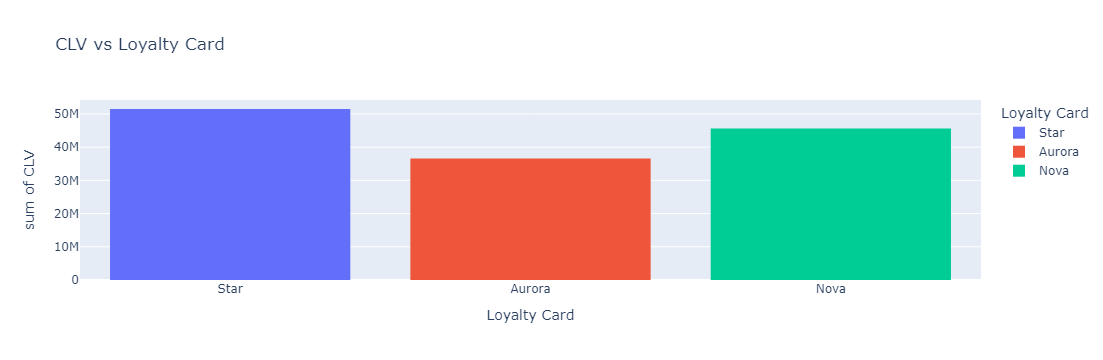

In [21]:
fig1 = px.histogram(final, x='Loyalty Card', y='CLV', color='Loyalty Card',
             title='CLV vs Loyalty Card')

# Show the plot
fig1.show()

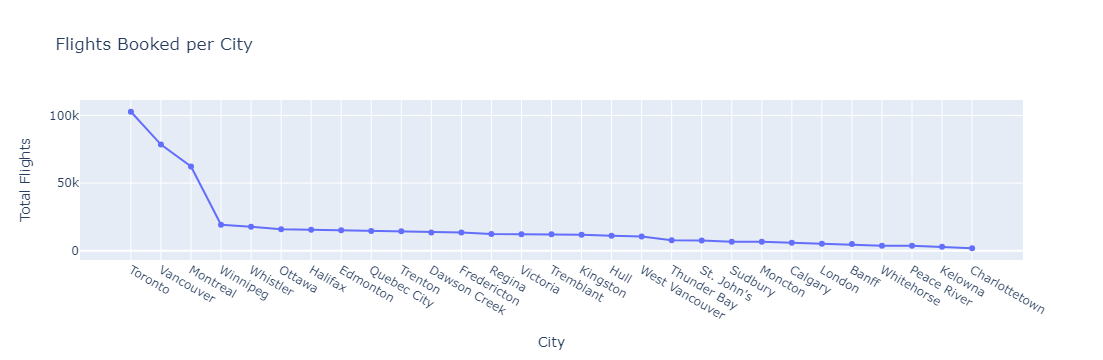

In [27]:
flights_per_city = final.groupby('City')['Total Flights'].sum().reset_index()
flights_per_city = flights_per_city.sort_values(by = 'Total Flights', ascending=False)

fig2 = px.line(flights_per_city[:100], x = 'City', y = 'Total Flights', markers=True, title = 'Flights Booked per City')
fig2.show()

In [31]:
flights = final[final['City'].isin(['Toronto', 'Vancouver', 'Montreal'])]
sum_TVM = flights['Total Flights'].sum()
sum_total = final['Total Flights'].sum()
percent=(sum_TVM/sum_total)*100

print(f"Out of all the flights booked in Canada, {percent:.2f}% of them are from Toronto, Vancouver or Montreal")

Out of all the flights booked in Canada, 47.83% of them are from Toronto, Vancouver or Montreal


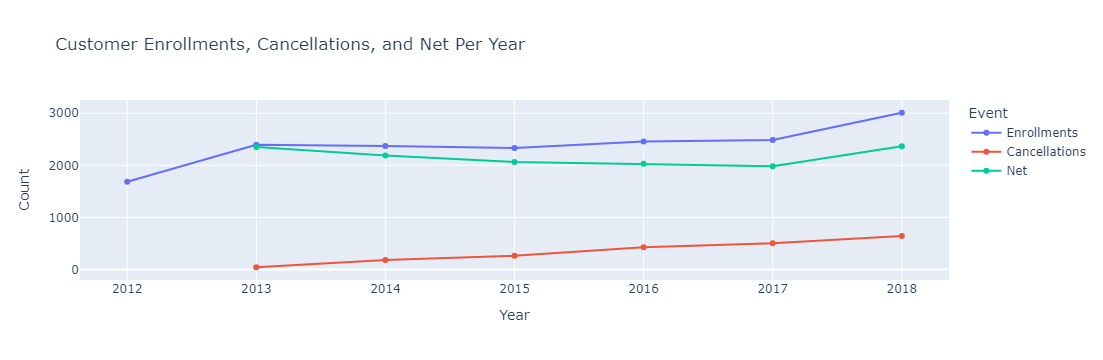

In [33]:
# Group by Enrollment Year
counts_enrollment = final.groupby('Enrollment Year')['Loyalty Number'].count().reset_index()

# Group by Cancellation Year
counts_cancellation = final.groupby('Cancellation Year')['Loyalty Number'].count().reset_index()

# Merge the dataframes on 'Year'
merged_counts = pd.merge(counts_enrollment, counts_cancellation, how='outer', left_on='Enrollment Year', right_on='Cancellation Year')

merged_counts = merged_counts.rename(columns={'Loyalty Number_x': 'Enrollments', 'Loyalty Number_y': 'Cancellations'})

# Calculate the net value
merged_counts['Net'] = merged_counts['Enrollments'] - merged_counts['Cancellations']

fig3 = px.line(merged_counts, x='Enrollment Year', y=['Enrollments', 'Cancellations', 'Net'],
              markers=True, title='Customer Enrollments, Cancellations, and Net Per Year',
              labels={'value': 'Count', 'variable': 'Event', 'Enrollment Year': 'Year'})

fig3.show()


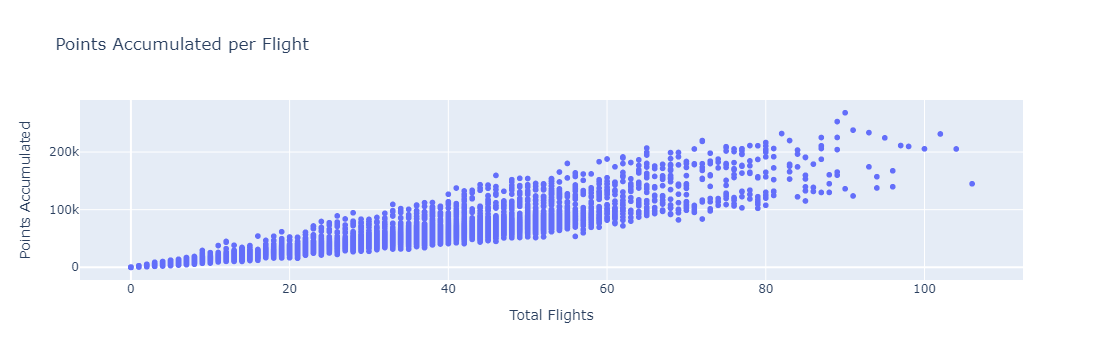

In [37]:
fig4 = px.scatter(final, y = 'Points Accumulated', x = 'Total Flights',title = 'Points Accumulated per Flight')
fig4.show()

In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [41]:
df = final[final["Cancelled"]!=1]
df = df[df["Total Flights"]!=0]
df

Loyalty Number        City Postal Code  Gender Education    Salary  \
0              480934     Toronto     M2Z 4K1  Female  Bachelor   83236.0   
1              549612    Edmonton     T3G 6Y6    Male   College       NaN   
3              608370     Toronto     P1W 1K4    Male   College       NaN   
4              530508        Hull     J8Y 3Z5    Male  Bachelor  103495.0   
5              193662  Whitehorse     Y2K 6R0    Male  Bachelor   51124.0   
...               ...         ...         ...     ...       ...       ...   
16731          900501     Sudbury     M5V 1G5    Male   College       NaN   
16732          823768   Vancouver     V6E 3Z3  Female   College       NaN   
16733          680886      Regina     S1J 3C5  Female  Bachelor   89210.0   
16734          776187   Vancouver     V5R 1W3    Male   College       NaN   
16735          906428  Whitehorse     Y2K 6R0    Male  Bachelor  -57297.0   

      Marital Status Loyalty Card       CLV Enrollment Type  Enrollment Year  \
0            Married         Star   3839.14        Standard             2016   
1           Divorced         Star   3839.61        Standard             2016   
3             Single         Star   3839.75        Standard             2013   
4            Married         Star   3842.79        Standard             2014   
5            Married         Star   3844.57        Standard             2012   
...              ...          ...       ...             ...              ...   
16731         Single         Star  61134.68        Standard             2012   
16732        Married         Star  61850.19        Standard             2012   
16733        Married         Star  67907.27        Standard             2014   
16734         Single         Star  74228.52        Standard             2014   
16735        Married         Star  10018.66  2018 Promotion             2018   

       Cancellation Year  Total Flights  Distance  Points Accumulated  \
0                    NaN             37     54525             54525.0   
1                    NaN             58     77487             77487.0   
3                    NaN             35     48432             48432.0   
4                    NaN             37     55515             55515.0   
5                    NaN             86    138596            138596.0   
...                  ...            ...       ...                 ...   
16731                NaN             29     45584             45584.0   
16732                NaN             38     53293             53293.0   
16733                NaN             59     86072             86072.0   
16734                NaN             50     61595             61595.0   
16735                NaN             51     68843            103264.5   

       Points Redeemed  Cancelled  
0                 1418          0  
1                 1971          0  
3                 1291          0  
4                    0          0  
5                 1222          0  
...                ...        ...  
16731              341          0  
16732                0          0  
16733             1645          0  
16734             1529          0  
16735                0          0  

[14051 rows x 17 columns]

In [45]:
df['Profit Efficiency'] = df['Points Redeemed'] / df['Total Flights']
df['Points per Flight'] = df['Points Accumulated'] / df['Total Flights']
df['Points'] = df['Points Redeemed'] / df['Points Accumulated']

In [47]:
# Select and extract selected features
X = df[['Total Flights','Profit Efficiency', 'Points per Flight', 'Points Accumulated', 'Points']]

# Normalize or scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (K)
k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [49]:
cluster_stats = df.groupby('Cluster').agg({
    'Loyalty Number': 'count',
    'Total Flights': ['mean', 'std'],
    'Points Accumulated': ['mean', 'std'],
    'Profit Efficiency': 'mean',
    'Points per Flight': 'mean',
    'Points': 'mean'
}).reset_index()

In [51]:
cluster_stats

Cluster Loyalty Number Total Flights            Points Accumulated  \
                   count          mean        std               mean   
0       0           5246     24.853412  10.570894       35900.881433   
1       1           1902     26.428496  10.991694       38077.628549   
2       2           6903     44.506446   9.021959       72529.289005   

                Profit Efficiency Points per Flight    Points  
            std              mean              mean      mean  
0  14836.062900         15.073768       1474.380798  0.010507  
1  16166.896525         72.916317       1447.588495  0.052499  
2  23404.634795         21.302874       1625.220508  0.013688

In [63]:
df['High Value Customer'] = (df['Cluster'] == 2).astype(int)

In [65]:
df[df['High Value Customer'] == 1][['Loyalty Number', 'Total Flights']].sort_values(by='Total Flights',ascending=False)

Loyalty Number  Total Flights
4168           336882            106
15818          813455            104
4543           385092            102
9654           983416            100
14263          732304             98
...               ...            ...
4141           302057             20
5784           491244             19
10621          802535             16
13390          236701             12
2552           928942             11

[6903 rows x 2 columns]

In [67]:
df[df['High Value Customer'] == 0][['Loyalty Number', 'Total Flights']].sort_values(by='Total Flights',ascending=False)

Loyalty Number  Total Flights
5849           275049             54
14511          539704             51
13640          389565             51
7842           122020             50
8281           228273             50
...               ...            ...
8550           472921              1
8536           282545              1
2445           226804              1
8514           628837              1
12421          414382              1

[7148 rows x 2 columns]

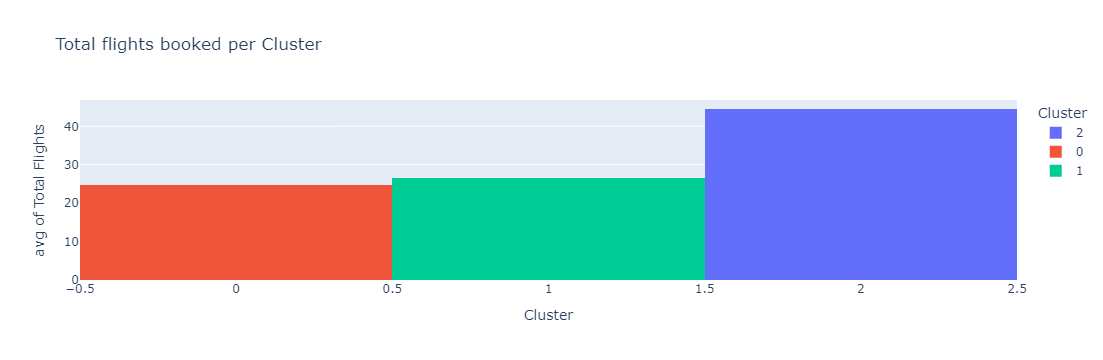

In [69]:
fig5 = px.histogram(df, x='Cluster', y='Total Flights', color='Cluster',
             title='Total flights booked per Cluster', histfunc='avg')

# Show the plot
fig5.show()